In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [2]:
info = pd.read_csv("../csvs/resonant_summary.csv")
info = info[(info['Mean'] < 7) & (info['Mean'] > 4)]
info.head()

,Unnamed: 0,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
2,2,10,1.295131e+07,6.286423,0.430377,5.089170e-01,NaN,NaN
3,3,100,6.997055e+04,4.889942,0.056187,7.102426e-07,6997.069300,9.999980
4,4,101,6.510553e+05,5.866219,0.173540,1.876975e-03,65105.555609,9.999996
5,5,102,1.198336e+07,6.010182,0.667901,1.980421e-01,NaN,NaN
11,11,108,1.786331e+06,6.581684,0.360616,5.600220e-01,3155.928058,566.023860


In [3]:
ranked_scores = info.sort_values("KSpval", ascending=False)
ranked_scores.head()

,Unnamed: 0,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
182,182,304,3.945664e+04,4.596120,4.419607e-54,1.000000,3945.681022,9.999956
151,151,259,3.369677e+05,5.898366,3.672694e-01,0.989680,316.078305,1066.089346
183,183,306,1.799591e+05,5.082403,4.321102e-01,0.935112,161.223849,1116.206721
244,244,388,6.307913e+06,6.879149,2.838590e-01,0.933626,NaN,NaN
178,178,30,9.271699e+05,6.167761,2.446575e-01,0.902691,92716.985579,10.000000


In [4]:
def plot_random_hists( planet_systems,title=None):
    ncol, nrow = 3,len(planet_systems)//3
    if (len(planet_systems)%3 != 0):
        nrow +=1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data = pd.read_csv("../csvs/resonant_distributions/" + planet_sys, index_col=0)
    
        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = planet_sys.split("_")[2]
        # make guassian
        mean, sigma =  info[info["ID"]==int(name)][["Mean", "Sigma"]].values[0]

        x = np.linspace(mean - sigma*4, mean+sigma*4, 100)
        rv = norm(loc = mean, scale = sigma)
        axarr[jj//ncol, jj%ncol ].plot(x, rv.pdf(x), linewidth = 4, color = "black")
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name + " Mean - " +str("{0:.3f}".format(mean)) + " Sigma - "+ str("{0:.3f}".format(sigma)), alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        axarr[jj//ncol, jj%ncol ].set_title(name + r': $\mu$=' +str("{0:.3f}".format(mean)) + r': $\sigma$='+ str("{0:.3f}".format(sigma)))
    plt.show()

['Res_sys_259_500.csv', 'Res_sys_306_500.csv', 'Res_sys_388_500.csv', 'Res_sys_30_500.csv', 'Res_sys_83_500.csv', 'Res_sys_226_500.csv']


/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/plotting/_core.py:2410: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


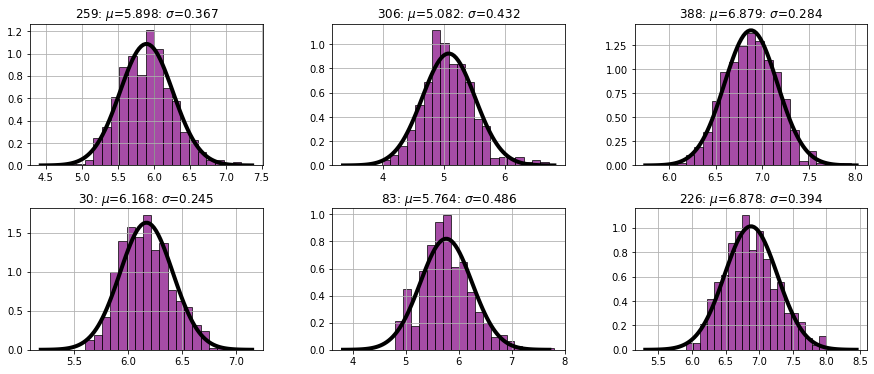

In [5]:
very_gaussian = ranked_scores.head(7)["ID"]
very_gaussian = ["Res_sys_{0}_500.csv".format(int(x))  for x in very_gaussian][1:]
print (very_gaussian)
plot_random_hists(very_gaussian)